Importamos las librerias necesarias:

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

Creamos nuestro toy dataset:

In [3]:
# X son las entradas, y son las etiquetas (0 o 1)
X = torch.tensor([[1.0, 2.0], [2.0, 3.0],
                  [3.0, 4.0], [4.0, 5.0]], requires_grad=True)
y = torch.tensor([0.0, 0.0, 1.0, 1.0]).view(-1, 1)


In [4]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [5]:
# Definimos la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [6]:
# Entrenamiento del modelo
epochs = 5
for epoch in range(epochs):

    print(f'\n--- Epoch {epoch + 1} ---')

    for i, (data, target) in enumerate(zip(X, y)):
        print(data, target)
        # Forward pass
        output = model(data)
        # Calculamos la perdida con la función
        loss = criterion(output, target)

        print(f'Batch {i + 1}:')
        print(f'  Antes del backward: Pesos {model[0].weight.data.numpy()}')

        # Realizamos la Backward pass
        loss.backward()

        print(f'  Gradientes calculadas: {model[0].weight.grad.numpy()}')

        # Actualizamos los pesos
        optimizer.step()

        print(f'  Después del step: Pesos actualizados {model[0].weight.data.numpy()}')

        # Ponemos a cero los gradientes
        optimizer.zero_grad()



--- Epoch 1 ---
tensor([1., 2.], grad_fn=<UnbindBackward0>) tensor([0.])
Batch 1:
  Antes del backward: Pesos [[ 0.26275092 -0.66824937]]
  Gradientes calculadas: [[0.15201478 0.30402955]]
  Después del step: Pesos actualizados [[ 0.24754944 -0.6986523 ]]
tensor([2., 3.], grad_fn=<UnbindBackward0>) tensor([0.])
Batch 2:
  Antes del backward: Pesos [[ 0.24754944 -0.6986523 ]]
  Gradientes calculadas: [[0.18877599 0.28316396]]
  Después del step: Pesos actualizados [[ 0.22867185 -0.7269687 ]]
tensor([3., 4.], grad_fn=<UnbindBackward0>) tensor([1.])
Batch 3:
  Antes del backward: Pesos [[ 0.22867185 -0.7269687 ]]
  Gradientes calculadas: [[-2.8422942 -3.7897258]]
  Después del step: Pesos actualizados [[ 0.5129013  -0.34799612]]
tensor([4., 5.], grad_fn=<UnbindBackward0>) tensor([1.])
Batch 4:
  Antes del backward: Pesos [[ 0.5129013  -0.34799612]]
  Gradientes calculadas: [[-2.2618976 -2.827372 ]]
  Después del step: Pesos actualizados [[ 0.73909104 -0.06525889]]

--- Epoch 2 ---
tensor

In [7]:

# Predicción final después de entrenamiento
with torch.no_grad():
    predicted = model(X)
    print("\nPredicciones después del entrenamiento:")
    print(predicted)



Predicciones después del entrenamiento:
tensor([[0.5083],
        [0.7009],
        [0.8415],
        [0.9233]])


Verificamos la actualización de pesos:


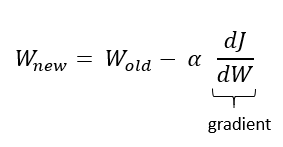